In [1]:
from scipy.stats import chi2
from scipy.stats import gamma
from scipy.stats import norm
from scipy.stats import skewnorm
from scipy.stats import lognorm
from scipy.stats import halfnorm
from scipy.stats import crystalball
from scipy.stats import laplace_asymmetric
from scipy.stats import halfcauchy

In [2]:
def laplace_asymmetricfit(args, x):
#     df = args
    Amp, kappa, loc, scale, b = args
#     print(df)
    rv = laplace_asymmetric(kappa = kappa, loc = loc, scale = scale)
    return Amp*rv.pdf(x) + b

In [3]:
def lstsq_laplace_asymmetricfit(args, x, y):
#     print(args, x, y)
    return laplace_asymmetricfit(args, x) - y

In [4]:
def skewnormfit(args, x):
#     df = args
    Amp, a, loc, scale, b, c, d = args
#     print(df)
    rv = skewnorm(a = a, loc = loc, scale = scale)
    return Amp*rv.pdf(x) + b + c*x + d*x*x

In [5]:
def lstsq_skewnormfit(args, x, y):
#     print(args, x, y)
    return skewnormfit(args, x) - y

In [6]:
def skewnormfit2(args, x):
#     df = args
    a, loc, scale, b, c, d = args
#     print(df)
    rv = skewnorm(a = a, loc = loc, scale = scale)
    return Amp*rv.pdf(x) + b + c*x + d*x*x

In [7]:
def lstsq_skewnormfit2(args, x, y):
#     print(args, x, y)
    return skewnormfit2(args, x) - y

In [8]:
def lognormfit(args, x):
#     df = args
    Amp, s, loc, scale, b, c = args
#     print(df)
    rv = lognorm(s = s, loc = loc, scale = scale)
    return Amp*rv.pdf(x) + b + c*x

In [9]:
def lstsq_lognormfit(args, x, y):
#     print(args, x, y)
    return lognormfit(args, x) - y

In [10]:
def normfit(args, x):
#     df = args
    Amp, loc, scale, a, b, c = args
#     print(df)
    rv = norm(loc = loc, scale = scale)
    return Amp*rv.pdf(x) + a + b*x +c*x*x

In [11]:
def lstsq_normfit(args, x, y):
#     print(args, x, y)
    return normfit(args, x) - y

In [12]:
def normfit2(args, x):
#     df = args
    Amp, loc, scale, a, b, c, d = args
#     print(df)
    rv = norm(loc = loc, scale = scale)
    return Amp*rv.pdf(x) + a + b*x + c*x*x + d*x*x*x

In [13]:
def lstsq_normfit2(args, x, y):
#     print(args, x, y)
    return normfit2(args, x) - y

In [14]:
def halfnormfit(args, x):
#     df = args
    Amp, scale, a, b, c = args
#     print(df)
    rv = halfnorm(scale = scale)
    return Amp*rv.pdf(x) + a + b*x + c*x*x

In [15]:
def lstsq_halfnormfit(args, x, y):
#     print(args, x, y)
    return halfnormfit(args, x) - y

In [16]:
def halfnormfit2(args, x):
#     df = args
    Amp, scale, a, b = args
#     print(df)
    rv = halfnorm(scale = scale)
    return Amp*rv.pdf(x) + a + b*x

In [17]:
def lstsq_halfnormfit2(args, x, y):
#     print(args, x, y)
    return halfnormfit2(args, x) - y

In [18]:
def halfcauchyfit(args, x):
#     df = args
    Amp, scale, a, b, c = args
#     print(df)
    rv = halfcauchy(scale = scale)
    return Amp*rv.pdf(x) + a + b*x + c*x*x

In [19]:
def lstsq_halfcauchyfit(args, x, y):
#     print(args, x, y)
    return halfcauchyfit(args, x) - y

In [20]:
def probFit(dist, bins, fit, res_lsq, hist = None, unchist = None):
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    if hist is None:
        hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    if unchist is None:
        unchist = np.sqrt(dist)/np.sum(dist)/np.diff(bincenters)[0]
    chi2fit = np.sum((hist - fit)**2/unchist**2)
    dof = len(hist) - len(res_lsq.x)
    pvalue = 1-chi2.cdf(chi2fit, dof)
    return pvalue, chi2fit, dof

In [21]:
from utils.epg import *
import matplotlib.pyplot as plt
from copy import copy
cmap = copy(plt.cm.get_cmap("jet"))
from scipy.optimize import least_squares

In [22]:
degree = r"${}^{\circ}$"
GeV = "GeV"
GeV2 = "GeV"+r"${}^{2}$"
GeVc = "GeV/c"
GeVc2 = "(GeV/c)"+r"${}^{2}$"

In [23]:
import matplotlib
# initial settings
pgf_with_latex = {
		"pgf.texsystem": "pdflatex",
		"text.usetex": True,            # use LaTeX to write all text
		"font.family": "sans-serif",         
		"font.sans-serif": "Helvetica",
		"font.size": 25,				# default font size
		"axes.labelsize": 24,			# x and y label size
		"axes.titlesize": 24,           # subfigure title size, i.e. title size when one figure
		"legend.fontsize": 22,			# legend size
		"xtick.labelsize": 23,			# x axis tick label size
		"ytick.labelsize": 23,			# y axis tick label 
		"figure.titlesize": 25,         # Figure title size, useful when you have multiple plots in one canvas.
		"pgf.preamble": r"\usepackage{xcolor}",     # xcolor for colours
		"figure.autolayout": True
}
matplotlib.rcParams.update(pgf_with_latex)

def nphistmean(hist, bins):
    s=0
    for i in range(len(hist)):
        s += hist[i] * ((bins[i] + bins[i+1]) / 2) 
    mean = s / np.sum(hist)
    return mean

In [24]:
def extendedBins(bins, left, right):
    binwidth = np.diff(bins)[0]
    leftbins = bins[0] - (np.linspace(1, left+1, left+1)*binwidth)[::-1]
    rightbins = np.linspace(1, right+1, right +1)*binwidth + bins[-1]
    return np.array([*leftbins, *bins, *rightbins])

## Inbending DVCS

In [25]:
parent_epg = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4.2/inb/epg/"
epg_4397 = pd.read_pickle(parent_epg + "4397" + "_epg.pkl")
epg_4076 = pd.read_pickle(parent_epg + "4076" + "_epg.pkl")

In [26]:
dvcsSimInb = epg_4397
bkgSimInb = epg_4076

In [27]:
dvcsSimInb = dvcsSimInb.loc[dvcsSimInb.Ge>2]
bkgSimInb = bkgSimInb.loc[bkgSimInb.Ge>2]

## CDFT cuts

In [47]:
dvcsSimInbCDFT = dvcsSimInb.loc[dvcsSimInb.config == 3]
bkgSimInbCDFT = bkgSimInb.loc[bkgSimInb.config == 3]

In [48]:
contInbCDFT = .0040597266707579184
contInbCD = 0.13554782386935704
contInbFD = 0.3804839519140771
contOutbCDFT = 0.005652963491001403
contOutbCD = 0.21805902894791315
contOutbFD = 0.5115950737954632

In [49]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT.MM2_ep, bins = np.linspace(-0.4, 0.4, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT.MM2_ep, bins = np.linspace(-0.4, 0.4, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params = [1, 0, 0.3, 0, 0, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT.MM2_ep, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT.MM2_ep, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp, loc, scale, a, b, c = params
    lb = norm.ppf(0.02, loc = loc, scale = scale)
    ub = norm.ppf(0.98, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 4*scale
        ub_opt = loc + 4*scale
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.0028130864317399418 136.41274238634784 94
[ 0.52080495  0.01352913  0.13019588  0.73290365  0.26274421 -2.48372299] -0.25386051143771154 0.2809187779604154 0.0028130864317399418
0.8214817824214234 81.31673899461771 94
[ 0.51898777  0.0129644   0.12337844  1.0273045   0.36366213 -4.30811906] -0.24042394555229132 0.26635274808974385 0.8214817824214234
0.8601097971353662 79.34404080251322 94
[ 0.58759827  0.01304389  0.12672435  0.92673086  0.33151353 -2.98847733] -0.24721610598378446 0.27330389323657556 0.8601097971353662
0.6247853983045498 89.05818718350046 94
0.6611880421495658 87.77244800897002 94
0.8463966060184471 80.07741172596764 94
0.708051649774526 86.05409918628428 94
0.6588228677492188 87.85706749218106 94
0.33633431501212685 99.22259383879688 94
0.8932954002284019 77.36005955668938 94
[ 0.57106194  0.01282348  0.12607774  0.94320535  0.34978697 -3.25033073] -0.24610853492772197 0.2717555022658629 0.8932954002284019


In [50]:
len(dvcsSimInbCDFT)

885499

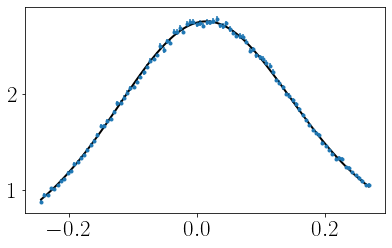

In [51]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [52]:
print(lb_opt, ub_opt)

-0.4914874712998769 0.5171344386380179


In [53]:
dvcsSimInbCDFT = dvcsSimInbCDFT.loc[(dvcsSimInbCDFT.MM2_ep<0.517)&(dvcsSimInbCDFT.MM2_ep>-0.491)]
bkgSimInbCDFT = bkgSimInbCDFT.loc[(bkgSimInbCDFT.MM2_ep<0.517)&(bkgSimInbCDFT.MM2_ep>-0.491)]

In [54]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT.MM2_eg, bins = np.linspace(-0.5, 2.5, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT.MM2_eg, bins = np.linspace(-0.5, 2.5, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params = [1, 0.908, 0.244, -0.471, 0.526, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT.MM2_eg, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT.MM2_eg, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp, loc, scale, a, b, c = params
    lb = norm.ppf(0.02, loc = loc, scale = scale)
    ub = norm.ppf(0.98, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 4*scale
        ub_opt = loc + 4*scale
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.0 320466.2939080221 94
0.00013418843079315845 152.30695288892247 94
[ 0.55944872  0.90203371  0.18714615 -1.12175142  3.28103644 -1.53760436] 0.5176825076879399 1.2863849157615044 0.00013418843079315845
0.033785535999650174 120.5668065085666 94
[ 0.6393237   0.89960671  0.19013014 -1.06027166  3.02585267 -1.34893056] 0.5091271364442962 1.2900862777982938 0.033785535999650174
0.2711696015884685 101.9027596878351 94
[ 0.66715011  0.89979113  0.19257369 -0.90654306  2.57642654 -1.10293553] 0.5042931346298702 1.2952891346687854 0.2711696015884685
0.07695171277404256 114.18148748338558 94
0.24248067985162158 103.1974240246791 94
0.06935787250960612 115.03722501765463 94
0.30101034693164086 100.63731543501112 94
[ 0.67344999  0.89987661  0.19300061 -0.8881051   2.52063947 -1.07215841] 0.5035018280902492 1.2962513975086876 0.30101034693164086
0.04517107387975483 118.4087985809505 94
0.2703724527778152 101.9376123997924 94


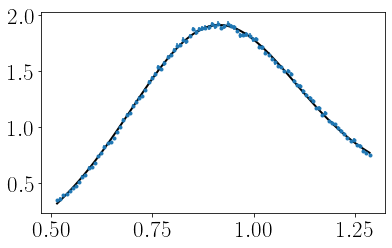

In [55]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [56]:
print(lb_opt, ub_opt)

0.12787418804876804 1.6718790375501689


In [57]:
dvcsSimInbCDFT = dvcsSimInbCDFT.loc[(dvcsSimInbCDFT.MM2_eg<1.672)&(dvcsSimInbCDFT.MM2_eg>0.128)]
bkgSimInbCDFT = bkgSimInbCDFT.loc[(bkgSimInbCDFT.MM2_eg<1.672)&(bkgSimInbCDFT.MM2_eg>0.128)]

In [58]:
len(dvcsSimInbCDFT)

610870

In [59]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT.ME_epg, bins = np.linspace(-0.2, 0.2, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT.ME_epg, bins = np.linspace(-0.2, 0.2, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params = [1, 0.1, 0.14, -0.471, 0.526, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT.ME_epg, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT.ME_epg, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp, loc, scale, a, b, c = params
    lb = norm.ppf(0.02, loc = loc, scale = scale)
    ub = norm.ppf(0.98, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 4*scale
        ub_opt = loc + 4*scale
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.21171265983125398 104.69558911367233 94
[0.95053724 0.01196096 0.13485687 0.45215263 1.75148976 0.24219327] -0.2650011866518846 0.28892310718293046 0.21171265983125398
0.12102400619259046 110.2330225046995 94
0.014962789569173185 126.19966270893369 94
0.0007121660013126307 143.91494101508263 94
0.0031939125762973086 135.68472973923855 94
0.10347115349138236 111.64359821553369 94
0.031267809680277425 121.12743292266181 94
0.05476354855470589 116.92456377436929 94
0.04704641562025935 118.0990272491171 94
0.01999409830800669 124.25727699340669 94


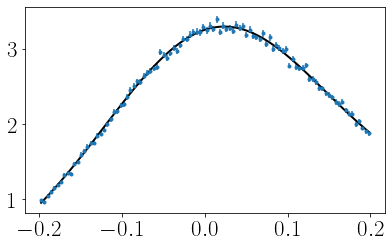

In [60]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [61]:
print(lb_opt, ub_opt)

-0.5274665140155504 0.5513884345465964


In [62]:
dvcsSimInbCDFT = dvcsSimInbCDFT.loc[(dvcsSimInbCDFT.ME_epg<0.551)&(dvcsSimInbCDFT.ME_epg>-0.527)]
bkgSimInbCDFT = bkgSimInbCDFT.loc[(bkgSimInbCDFT.ME_epg<0.551)&(bkgSimInbCDFT.ME_epg>-0.527)]

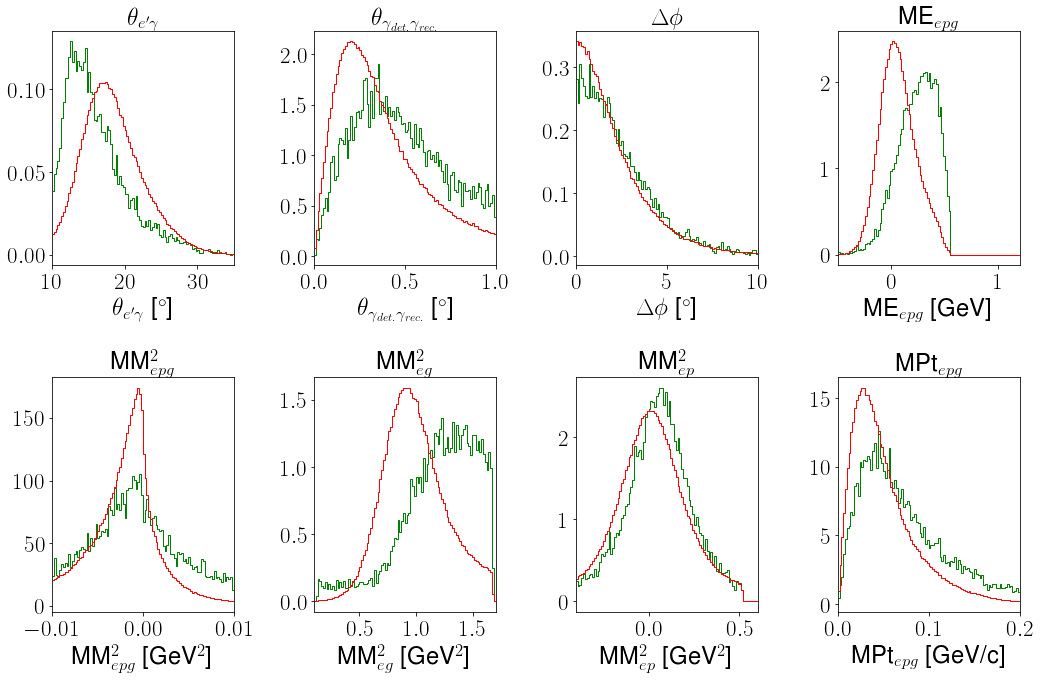

<Figure size 432x288 with 0 Axes>

In [63]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 1.2, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvpi0, where='mid',color='g', linewidth=1)
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [64]:
pvalue_opt = -0.1
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT.coplanarity, bins = np.linspace(0, 10, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT.coplanarity, bins = np.linspace(0, 10, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params =[1, 0.8, 0, 0, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT.coplanarity, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT.coplanarity, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_halfnormfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp,  scale, a, b, c  = params
#     lb = min(halfnorm.ppf(0.1, loc = loc, scale = scale), -0.01)
#     ub = max(halfnorm.ppf(0.9, loc = loc, scale = scale), 0.003)
    lb = 0#min(halfnorm.ppf(0, a=a, loc = loc, scale = scale), -0.003)
    ub = 9#max(halfnorm.ppf(0.9, scale = scale), 0.002)
    pvalue, chi2fit, dof = probFit(simDist, bins,  halfnormfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0#halfnorm.ppf(0, a=a, loc = loc, scale = scale)
        ub_opt = 4*scale#halfnorm.ppf(1-2*0.00003, scale = scale)
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

2.220446049250313e-16 254.09469882691272 95
[ 4.26335354e-01  1.84759103e+00  1.64071070e-01 -3.23552205e-02
  1.65218630e-03] 0 9 2.220446049250313e-16
1.3322676295501878e-15 247.94047111456658 95
[ 4.30152202e-01  1.84615291e+00  1.64322304e-01 -3.22530709e-02
  1.63459601e-03] 0 9 1.3322676295501878e-15
1.3322676295501878e-15 247.94047111456658 95
1.3322676295501878e-15 247.94047111456658 95
1.3322676295501878e-15 247.94047111456658 95
1.3322676295501878e-15 247.94047111456658 95
1.3322676295501878e-15 247.94047111456658 95
1.3322676295501878e-15 247.94047111456658 95
1.3322676295501878e-15 247.94047111456658 95
1.3322676295501878e-15 247.94047111456658 95


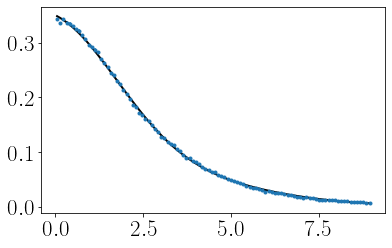

In [65]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
# plt.plot(bincenters_opt, skewnormfit([0.6, -2, 0, 0.003, 0, 0, 0], bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.plot(bincenters_opt, halfnormfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [66]:
print(ub_opt)

7.3846116576359835


In [67]:
dvcsSimInbCDFT = dvcsSimInbCDFT.loc[(dvcsSimInbCDFT.coplanarity<7.384)]
bkgSimInbCDFT = bkgSimInbCDFT.loc[(bkgSimInbCDFT.coplanarity<7.384)]

In [68]:
np.linspace(3, 8.5, 12)

array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. , 8.5])

In [69]:
GeEdges = np.linspace(3.5, 8.5, 11)
lbs = []
ubs = []
for j in range(len(GeEdges[:-1])):
    df1 = dvcsSimInbCDFT.loc[(dvcsSimInbCDFT.Ge>GeEdges[j])&(dvcsSimInbCDFT.Ge<GeEdges[j+1])]
    df2 = bkgSimInbCDFT.loc[(bkgSimInbCDFT.Ge>GeEdges[j])&(bkgSimInbCDFT.Ge<GeEdges[j+1])]
    pvalue_opt = 0
    for i in range(0, 1):
        if i == 0:
            print(len(df1))
            simDist_dvcs, bins = np.histogram(df1.coneAngle, bins = 21)
            bins = np.linspace(bins[np.argmax(simDist_dvcs)] -2.5, bins[np.argmax(simDist_dvcs)] + 4, 21)
            simDist_dvcs, _ = np.histogram(df1.coneAngle, bins = bins)
            simDist_dvpi0, _ = np.histogram(df2.coneAngle, bins = bins)
            bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
            simDist = (1-contInbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
            uncDist = np.sqrt((1-contInbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
            params = [1, bins[np.argmax(simDist)], 2.5, 0, 0, 0]
        else:
            simDist_dvcs, bins = np.histogram(df1.coneAngle, bins = np.linspace(lb, ub, 101))
            simDist_dvpi0, bins = np.histogram(df2.coneAngle, bins = np.linspace(lb, ub, 101))
            bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
            simDist = (1-contInbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
            uncDist = np.sqrt((1-contInbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
        params = res_lsq.x
        Amp, loc, scale, a, b, c = params
        lb = norm.ppf(0.02, loc = loc, scale = scale)
        ub = norm.ppf(0.98, loc = loc, scale = scale)
        pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
        print(pvalue, chi2fit, dof)
        if pvalue>pvalue_opt:
            pvalue_opt = pvalue
            bins_opt = bins
            bincenters_opt = bincenters
            params_opt = res_lsq.x
            lb_opt = loc - 4*scale
            ub_opt = loc + 4*scale
            lbs.append(lb_opt)
            ubs.append(ub_opt)
            dist_opt = simDist
            unc_opt = uncDist
            print(params_opt, lb, ub, pvalue)

3415
0.6615341003932693 11.309944318027895 14
[ 6.39184648e-01  1.19704989e+01  1.15725414e+00  1.60657399e-01
 -3.22027530e-03 -4.35669834e-04] 9.593789470628119 14.347208345574872 0.6615341003932693
7671
0.07906904988984154 21.97792706543654 14
[ 7.58631834e-01  1.25246885e+01  1.29104073e+00  2.20801556e-01
 -2.23143009e-02  6.00892798e-04] 9.873214984395398 15.176161957531935 0.07906904988984154
13801
0.1066237251195471 20.809167535593133 14
[ 5.78575402e-01  1.30889918e+01  1.25728652e+00 -2.79528307e-01
  5.57649237e-02 -2.20035459e-03] 10.506840993148588 15.671142643723105 0.1066237251195471
22257
0.9791767536049552 5.41397654771628 14
[ 4.22300405e-01  1.37215135e+01  1.23531172e+00 -1.00358722e+00
  1.62210078e-01 -5.90391321e-03] 11.184493430937513 16.258533612218198 0.9791767536049552
34274
0.4401730337792146 14.128624547619973 14
[ 1.10558674e+00  1.44206622e+01  1.74475267e+00  7.19224437e-01
 -1.03779395e-01  3.64891281e-03] 10.837378290160348 18.003946062430487 0.4401730

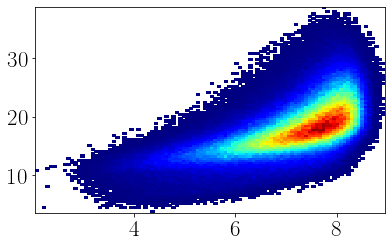

In [70]:
plt.hist2d(dvcsSimInbCDFT.Ge, dvcsSimInbCDFT.coneAngle, bins = 100, cmin = 1, cmap = cmap)
plt.show()

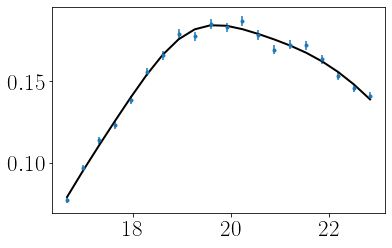

In [71]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
# plt.plot(bincenters_opt, skewnormfit([0.6, -2, 0, 0.003, 0, 0, 0], bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [72]:
def lstsq_polyfit(args, x, y):
    x = np.array(x)
    return np.poly1d(args)(x) - y

[-0.23361414  4.46006976  2.74927422]
[ 0.556893   -5.22117026 19.65090333]


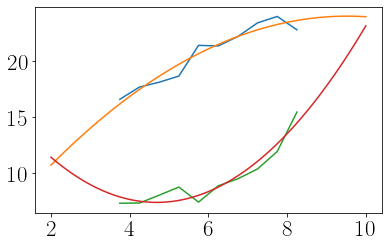

In [74]:
plt.plot((GeEdges[1:]+GeEdges[:-1])/2, ubs)
res_lsq = least_squares(lstsq_polyfit, [0, 0, 0], args=((GeEdges[1:]+GeEdges[:-1])/2, ubs))
plt.plot(np.linspace(2, 10, 101), np.poly1d([-0.234, 4.460, 2.749])(np.linspace(2, 10, 101)))
# plt.plot(np.linspace(2, 10, 101), np.poly1d(res_lsq.x)(np.linspace(2, 10, 101)))
print(res_lsq.x)

plt.plot((GeEdges[1:]+GeEdges[:-1])/2, lbs)
res_lsq = least_squares(lstsq_polyfit, [0, 0, 0], args=((GeEdges[1:]+GeEdges[:-1])/2, lbs))
plt.plot(np.linspace(2, 10, 101), np.poly1d([0.557, -5.221, 19.651])(np.linspace(2, 10, 101)))
# plt.plot(np.linspace(2, 10, 101), np.poly1d(res_lsq.x)(np.linspace(2, 10, 101)))
print(res_lsq.x)


In [75]:
dvcsSimInbCDFT = dvcsSimInbCDFT.loc[(dvcsSimInbCDFT.coneAngle<np.poly1d([-0.234, 4.460, 2.749])(dvcsSimInbCDFT.Gp))&(dvcsSimInbCDFT.coneAngle>np.poly1d([0.557, -5.221, 19.651])(dvcsSimInbCDFT.Gp))]
bkgSimInbCDFT = bkgSimInbCDFT.loc[(bkgSimInbCDFT.coneAngle<np.poly1d([-0.234, 4.460, 2.749])(bkgSimInbCDFT.Gp))&(bkgSimInbCDFT.coneAngle>np.poly1d([0.557, -5.221, 19.651])(bkgSimInbCDFT.Gp))]

In [76]:
len(dvcsSimInbCDFT)

499271

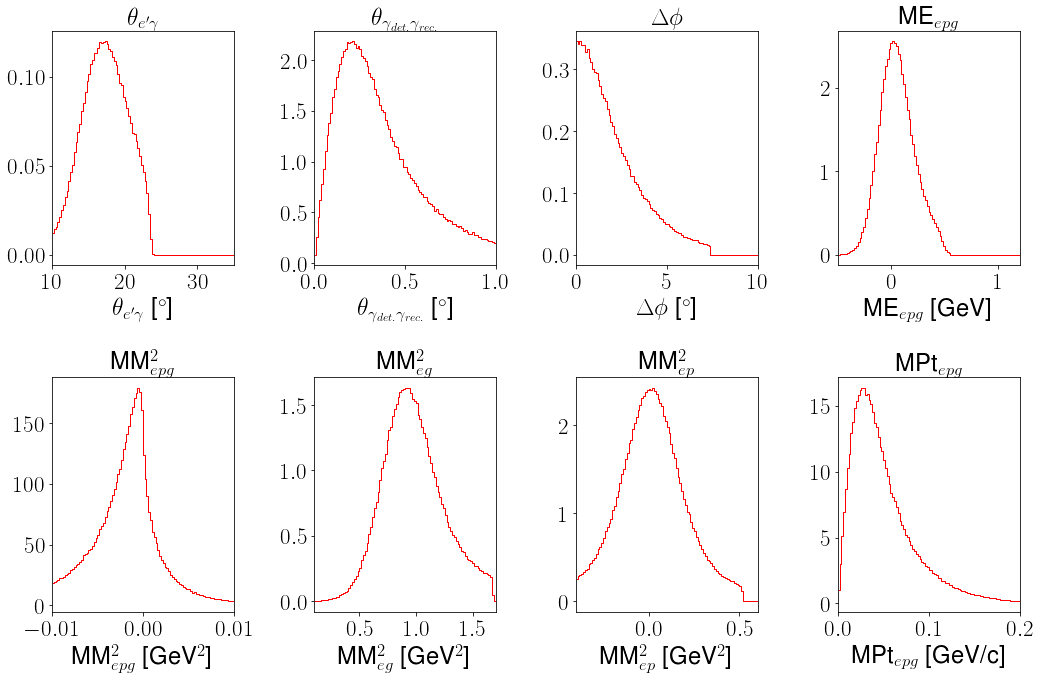

<Figure size 432x288 with 0 Axes>

In [77]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 1.2, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [78]:
pvalue_opt = -0.1
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT.MPt, bins = np.linspace(0.005, 0.05, 21))
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT.MPt, bins = np.linspace(0.005, 0.05, 21))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params =[1, 0.01, 0.05, 0, 0, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT.MPt, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT.MPt, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp, loc, scale, a, b, c = params
    lb = 0.005#min(halfnorm.ppf(0, a=a, loc = loc, scale = scale), -0.003)
    ub = min(norm.ppf(0.9, loc = loc, scale = scale), 0.04)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0#halfnorm.ppf(0, a=a, loc = loc, scale = scale)
        ub_opt = loc+4*scale#norm.ppf(1-2*0.0228, scale = scale)
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.25014669689466484 17.114133250523746 14
[ 6.84802085e+00  1.79821661e-02  3.04098784e-02 -7.55294722e+01
  3.33136593e+02  1.03662297e+04] 0.005 0.04 0.25014669689466484
0.021513118666924957 123.75640716730193 94
0.003280468644503709 135.53055236272493 94
0.021639686707847106 123.71609567970748 94
0.006490086025404462 131.48749555253215 94
0.021470304725701994 123.77009057958374 94
0.021513123486646024 123.75640562826207 94
0.005968429805987996 131.9960666637622 94
0.02151325406316429 123.75636393250828 94
0.0077019143845580285 130.43698334343733 94


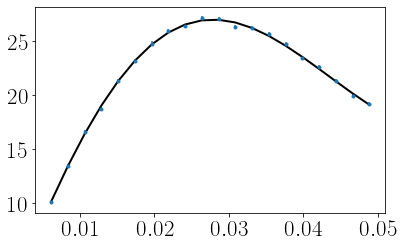

In [79]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
# plt.plot(bincenters_opt, skewnormfit([0.6, -2, 0, 0.003, 0, 0, 0], bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [80]:
params_opt

array([ 6.84802085e+00,  1.79821661e-02,  3.04098784e-02, -7.55294722e+01,
        3.33136593e+02,  1.03662297e+04])

In [82]:
print(ub_opt)

0.13962167977169707


In [83]:
dvcsSimInbCDFT = dvcsSimInbCDFT.loc[(dvcsSimInbCDFT.MPt<0.140)]
bkgSimInbCDFT = bkgSimInbCDFT.loc[(bkgSimInbCDFT.MPt<0.140)]

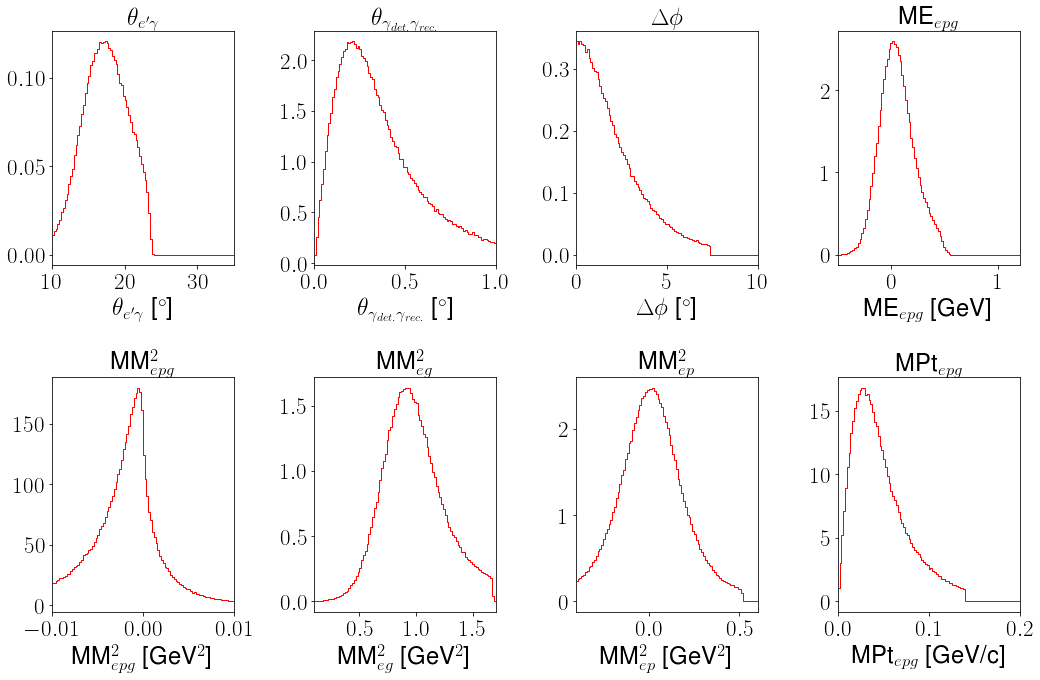

<Figure size 432x288 with 0 Axes>

In [84]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 1.2, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [85]:
pvalue_opt = -0.1
for i in range(0, 3):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT.reconGam, bins = np.linspace(0.005, 0.5, 21))
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT.reconGam, bins = np.linspace(0.005, 0.5, 21))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params =[1, 0.01, 0.3, 0, 0, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT.reconGam, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT.reconGam, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp, loc, scale, a, b, c = params
    lb = 0.005#min(halfnorm.ppf(0, a=a, loc = loc, scale = scale), -0.003)
    ub = min(norm.ppf(0.9, loc = loc, scale = scale), 0.6)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0#halfnorm.ppf(0, a=a, loc = loc, scale = scale)
        ub_opt = loc+4*scale#norm.ppf(1-2*0.0228, loc = loc, scale = scale)
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.7376133694047264 10.330893375000372 14
[  1.14113968   0.1372212    0.1600887   -1.99729738  14.23277014
 -16.45212404] 0.005 0.3423831309351886 0.7376133694047264
0.17333817644961902 106.7805641645867 94
0.24879536162153026 102.90489058277572 94


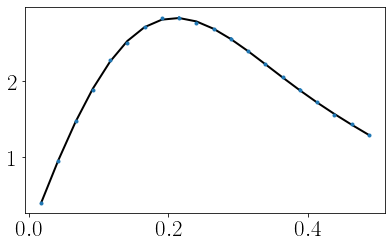

In [86]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
# plt.plot(bincenters_opt, skewnormfit([0.6, -2, 0, 0.003, 0, 0, 0], bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [87]:
print(ub_opt)

0.7775760123427787


In [88]:
dvcsSimInbCDFT = dvcsSimInbCDFT.loc[dvcsSimInbCDFT.reconGam<0.778]
bkgSimInbCDFT = bkgSimInbCDFT.loc[bkgSimInbCDFT.reconGam<0.778]

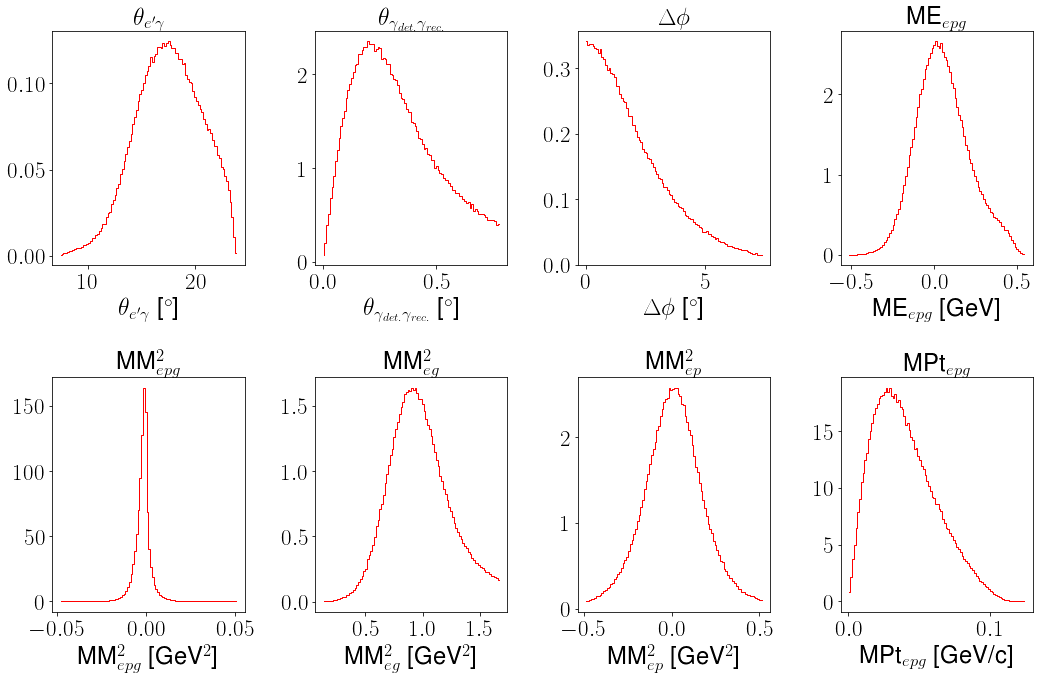

<Figure size 432x288 with 0 Axes>

In [89]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 0.7, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [91]:
print(dvcsSimInbCDFT.MM2_epg.mean()+4*dvcsSimInbCDFT.MM2_epg.std(), dvcsSimInbCDFT.MM2_epg.mean()-4*dvcsSimInbCDFT.MM2_epg.std())

0.015710463605489333 -0.019432757517014745
